# CS-GY 6313 / CUSP-GX 6006: Data Visualization - Spring '24
# Homework #2

**Name:** Jayanth Anala \\
**NetID:** ja4874 \\
**Email:** ja4874@nyu.edu

In [ ]:
!pip install pandas
!pip install geopandas
!pip install geoplot
!pip install pyogrio

In [31]:
import pandas as pd
import geopandas
import geoplot
import matplotlib.pyplot as plt

## Data Pre-Processing (3/15 points)

In [33]:
# ----------------------- #
# DO NOT MODIFY THIS CODE #
# ----------------------- #

trips_df = pd.read_csv('./datasets/202007-divvy-tripdata.csv')
community_df = geopandas.read_file('./datasets/chicago-community-areas.geojson')
stations_df = pd.read_csv('./datasets/station-locations.csv')

### Bike Trip Pre-processing (1 point)


**TODO:** \\
Within the bike trip data that we loaded (`trips_df`), get rid of missing (`NaN`) start and end station ids, and convert those columns to integer columns. Make sure the modified dataframe is referenced as `trips_pr_df`.

Number of `NaN` Values: \\
`start_station_id`: 152 \\
`end_station_id`: 969 \\


*   I got rid of these missing values from start and end station ids
*   I also converted those columns to integers from floats.






In [34]:
"""
TODO:
Within the bike trip data that we loaded (`trips_df`), get rid of missing (`NaN`)
start and end station ids, and convert those columns to integer columns.
Make sure the modified dataframe is referenced as `trips_pr_df`.
"""

## Pre Removal - Getting info
trips_df.info()
start_nan_count = trips_df['start_station_id'].isna().sum()
end_nan_count = trips_df['end_station_id'].isna().sum()
print(start_nan_count, end_nan_count)

## Removal - Removing NaN values from start and end stations [MAIN ANSWER]
trips_df.dropna(subset=['start_station_id','end_station_id'],inplace = True)
trips_df['start_station_id'] = trips_df['start_station_id'].astype(int)
trips_df['end_station_id'] = trips_df['end_station_id'].astype(int)
trips_pr_df = trips_df

## Post Removal - getting info
trips_pr_df.info()
start_nan_count = trips_pr_df['start_station_id'].isna().sum()
end_nan_count = trips_pr_df['end_station_id'].isna().sum()
print(start_nan_count,end_nan_count)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551480 entries, 0 to 551479
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             551480 non-null  object 
 1   rideable_type       551480 non-null  object 
 2   started_at          551480 non-null  object 
 3   ended_at            551480 non-null  object 
 4   start_station_name  551331 non-null  object 
 5   start_station_id    551328 non-null  float64
 6   end_station_name    550513 non-null  object 
 7   end_station_id      550511 non-null  float64
 8   start_lat           551480 non-null  float64
 9   start_lng           551480 non-null  float64
 10  end_lat             550710 non-null  float64
 11  end_lng             550710 non-null  float64
 12  member_casual       551480 non-null  object 
dtypes: float64(6), object(7)
memory usage: 54.7+ MB
152 969
<class 'pandas.core.frame.DataFrame'>
Int64Index: 550425 entries, 0 to 551479


### Community Areas Pre-processing (1 point)

**TODO:** \\
Within the geojson data for the Chicago community areas (`community_df`), rename the column `area_numbe` to `area_number`, and convert that column to an integer column. Make sure to reference the modified geojson data as `community_pr`.

*   Renamed the column `area_numbe` to `area_number` using `rename()`
*   Converted `area_number` to integer using `astype(int)`




In [35]:
"""
TODO:
Within the geojson data for the Chicago community areas (`community_df`), rename the
column `area_numbe` to `area_number`, and convert that column to an integer
column. Make sure to reference the modified geojson data as `community_pr`.
"""
#pre
community_df.info()
#post
community_df.rename(columns={"area_numbe": "area_number"},inplace=True)
community_df['area_number'] = community_df['area_number'].astype(int)
community_pr_df = community_df
community_pr_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   community   77 non-null     object  
 1   area        77 non-null     object  
 2   shape_area  77 non-null     object  
 3   perimeter   77 non-null     object  
 4   area_num_1  77 non-null     object  
 5   area_numbe  77 non-null     object  
 6   comarea_id  77 non-null     object  
 7   comarea     77 non-null     object  
 8   shape_len   77 non-null     object  
 9   geometry    77 non-null     geometry
dtypes: geometry(1), object(9)
memory usage: 6.1+ KB
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   community    77 non-null     object  
 1   area         77 non-null     object  
 2   shape_area   77 non-null     object  
 3   p

### Stations Pre-processing (1 point)

**TODO:**
Within the bike station location data (`stations_df`), convert it to a
`GeoDataFrame` and set its geometry to the point specified by the longitude
and latitude pair. Make sure to reference the modified data as `stations_pr_df`. \\

*   Converting the `stations_df` dataframe to GeoDataframe
*   The geometry is set based on `lat` and `lon` pair
*   The crs parameter of the `stations_pr_df` GeoDataFrame is set to the same as the `community_pr_df` GeoDataFrame.




In [36]:
"""
TODO:
Within the bike station location data (`stations_df`), convert it to a
`GeoDataFrame` and set its geometry to the point specified by the longitude
and latitude pair. Make sure to reference the modified data as
`stations_pr_df`.
"""
#pre
stations_df.info()
#post
geometry = geopandas.points_from_xy(stations_df['lon'], stations_df['lat'])
stations_pr_df = geopandas.GeoDataFrame(stations_df, geometry=geometry)
stations_pr_df.info()

stations_pr_df = stations_pr_df.set_crs(community_pr_df.crs)

# stations_pr_gdf = stations_pr_gdf.drop(columns=['lon', 'lat'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 691 entries, 0 to 690
Data columns (total 21 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   has_kiosk                             691 non-null    bool   
 1   lat                                   691 non-null    float64
 2   lon                                   691 non-null    float64
 3   external_id                           691 non-null    object 
 4   rental_uris                           691 non-null    object 
 5   short_name                            667 non-null    object 
 6   rental_methods                        667 non-null    object 
 7   electric_bike_surcharge_waiver        691 non-null    bool   
 8   eightd_station_services               691 non-null    object 
 9   name                                  691 non-null    object 
 10  capacity                              691 non-null    int64  
 11  station_id         

## Geographical Visualization (12/15 points)

### Spatial Join (2 points)

**TODO:**
Given points from station locations, we want to find out which
community areas those points are in. This can be accomplished
using an `sjoin`(https://geopandas.org/en/stable/gallery/spatial_joins.html)
in `geopandas`. After joining the two datasets, you should be
able to find the area_number for each `station_id`.



*   I have joined `community_pr_df` and `stations_pr_df` using Geopandas `sjoin`


* ```
geopandas.sjoin(left_df, right_df, how='inner', predicate='intersects', lsuffix='left', rsuffix='right', **kwargs)
```


*   I have used `inner` join, explanation included in next sections.



In [37]:
"""
TODO:
Given points from station locations, we want to find out which
community areas those points are in. This can be accomplished
using an `sjoin` (https://geopandas.org/en/stable/gallery/spatial_joins.html)
in `geopandas`. After joining the two datasets, you should be
able to find the area_number for each `station_id`.
"""

station_community_df = None
station_community_df = geopandas.sjoin(community_pr_df, stations_pr_df, how="inner")
station_community_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 677 entries, 0 to 75
Data columns (total 32 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   community                             677 non-null    object  
 1   area                                  677 non-null    object  
 2   shape_area                            677 non-null    object  
 3   perimeter                             677 non-null    object  
 4   area_num_1                            677 non-null    object  
 5   area_number                           677 non-null    int64   
 6   comarea_id                            677 non-null    object  
 7   comarea                               677 non-null    object  
 8   shape_len                             677 non-null    object  
 9   geometry                              677 non-null    geometry
 10  index_right                           677 non-null    int64   
 11 

### Add Community Areas to Trips (4 points)

**TODO:** \\
Use the updated dataframe from the previous part with the bike trip dataset to add columns specifying the start and end community area numbers (`start_ca_num` and `end_ca_num`) for each trip. Remove any entries in your final results that have `NaN` values for either `start_ca_num` or `end_ca_num`.Save your results in `trips_community_df`.


* The merging is done base don `name` and using `pd.merge()` instead of `.sjoin()`
* `DataFrame.merge(right, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'), copy=None, indicator=False, validate=None)`

In [38]:
"""
TODO:
Use the updated dataframe from the previous part with the bike trip dataset to add
columns specifying the start and end community area numbers (`start_ca_num` and
`end_ca_num`) for each trip. Remove any entries in your final results that have
`NaN` values for either `start_ca_num` or `end_ca_num`.Save your results in
`trips_community_df`.
"""

trips_community_df = None

## Start stations x trips
trips_community_df = pd.merge(trips_pr_df, station_community_df[['name', 'area_number']],  how='inner', left_on='start_station_name', right_on='name')
trips_community_df.rename(columns={'area_number': 'start_ca_num'},inplace=True)
trips_community_df.drop(columns=['name'], inplace=True)

## End stations x trips
trips_community_df = pd.merge(trips_community_df, station_community_df[['name', 'area_number']], how='inner', left_on='end_station_name', right_on='name')
trips_community_df.rename(columns={'area_number': 'end_ca_num'},inplace=True)
trips_community_df.drop(columns=['name'], inplace=True)

## dropping unused cols start_ca and end_ca
trips_community_df.dropna(subset=['start_ca_num','end_ca_num'])
trips_community_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 530011 entries, 0 to 530010
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             530011 non-null  object 
 1   rideable_type       530011 non-null  object 
 2   started_at          530011 non-null  object 
 3   ended_at            530011 non-null  object 
 4   start_station_name  530011 non-null  object 
 5   start_station_id    530011 non-null  int64  
 6   end_station_name    530011 non-null  object 
 7   end_station_id      530011 non-null  int64  
 8   start_lat           530011 non-null  float64
 9   start_lng           530011 non-null  float64
 10  end_lat             530011 non-null  float64
 11  end_lng             530011 non-null  float64
 12  member_casual       530011 non-null  object 
 13  start_ca_num        530011 non-null  int64  
 14  end_ca_num          530011 non-null  int64  
dtypes: float64(4), int64(4), object(7)

### Explaining the Joins (2 points)

In a short (no more than a paragraph) description, please briefly answer the following inquiries. You can write either in Markdown or in code comments in the space provided in the notebook file.
   
1. For each join conducted in steps 1 and 2, what was your rationale for using these particular join types?
Inquiry 1:

`Step 1:`

The rationale behind using an `inner join` in steps 1 is to ensure that only the stations and community areas that have a spatial overlap are included in the resulting df. we're interested in knowing which community area each station falls within but when we include stations or community areas that do not have a spatial overlap then we would end up with irrelevant information in the final df.

`Step 2:`

We used inner join in both the operations when merging the `trips_pr_df` with the `station_community_df` based on
station names. Reason is it ensures that only the trips that have both a start and end station present in the
station_community_df are included in the final df. we're interested in identifying the community area numbers
for both the start and end stations of each trip, only an inner join ensures that we retain only the relevant
data where matches are found in both datasets.

`Simply saying, we want to keep only the rows where there is a match between the station_names in the trips_pr_df
and the station names in the station_community_df.` \\

If used `left`join \\
![Left](https://i.postimg.cc/HWSRPBjW/temp-Imagebeti5a.avif)

If used `right`join \\
![Right](https://i.postimg.cc/QxHwL1WQ/temp-Image2pq-Rv-S.avif)
2. Did your final `trips_community_df` end up a different size from the original `trips_pr_df` dataframe? If so, what do you think caused this difference in size? \\

A. Obviously since it;s an inner join and it only considers intersection data from two dfs. The two main reasons would be `missing station data` and `stations outside communitty areas`. Like invalid or missing some trips in the original `trips_pr_df` may have had missing or invalid station names (start_ca or end_ca station names), leading to `NaN` values after the inner join, which we removed removed using dropna(). There may have been stations in the original `trips_pr_df` that did not fall within any of the community areas covered in the `station_community_df`. hence, no community area number could be assigned to these stations, and their related trips would've been removed during the join. These might be the reasons for differencein size in the `trips_community_df`. This merge can also be done using `station_id` instead of `name` given in the hints. it produces the same result.

In [ ]:
"""
OPTIONAL:
Use this space for either your answers for the above prompt or to run additional code.

This is Based on Station_ID instead of name

# trips_community_df = None
# trips_community_df = pd.merge(trips_pr_df, station_community_df[['station_id', 'area_number']], left_on='start_station_id', right_on='station_id', how='inner')
# trips_community_df = trips_community_df.rename(columns={'area_number': 'start_ca_num'})
# trips_community_df.drop(columns=['station_id'], inplace=True)
# trips_community_df = pd.merge(trips_community_df, station_community_df[['station_id', 'area_number']], left_on='end_station_id', right_on='station_id', how='inner')
# trips_community_df = trips_community_df.rename(columns={'area_number': 'end_ca_num'})
# trips_community_df.drop(columns=['station_id'], inplace=True)
# trips_community_df.dropna(subset=['start_ca_num','end_ca_num'])
# trips_community_df.info()

"""


### Visualize Station Distribution (4 points)

<Axes: >

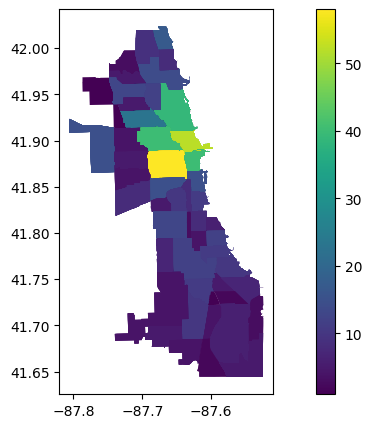

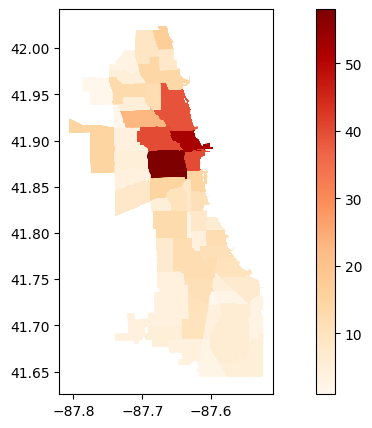

In [39]:
"""
TODO:
We want to understand which community areas have bike stations. Using `geopandas`,
generate a plot of the number of stations per community area. This can be
accomplished by aggregating the stations by community area. Then use the `plot()`
command to generate a chloropleth map. You are allowed to define a colormap for
your chloropleth map via the `cmap` parameter.
"""
station_community_grouped_data_df = None
station_community_grouped_data_df = station_community_df.groupby('community').size().reset_index(name='stations_in_a_community')
station_community_plot_df = station_community_df.merge(station_community_grouped_data_df, on='community')

#Plot
station_community_plot_df.plot(column='stations_in_a_community', legend=True, figsize=(11, 5))
station_community_plot_df.plot(column='stations_in_a_community', cmap='OrRd', legend=True, figsize=(11, 5))